In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('advertising_ab.csv')
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [3]:
import scipy
import scipy.stats as stats

delta = 0.01        # 组间预期的绝对增长
alpha = 0.05       # 显著性水平
power = 0.8        # 统计功效
std_dev = 0.04      # 总体的假定方差

beta = 1 - power
print(f"beta : {beta}")

# 计算 z-α 和 z-beta
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(1 - beta)

print(f"z-alpha : {z_alpha}")
print(f"z-beta : {z_beta}")

# 计算样本数量
n = 2 * (std_dev**2) * ((z_alpha+z_beta)**2) / (delta**2)
sample_2_group = n*2

print(f"Number of sample size needed: {n:.0f}")
print(f"Number of sample size needed for two groups: {sample_2_group:.0f}")

beta : 0.19999999999999996
z-alpha : 1.959963984540054
z-beta : 0.8416212335729143
Number of sample size needed: 251
Number of sample size needed for two groups: 502


In [5]:
max_date = data['date'].max()
min_date = data['date'].min()
print(f"Maksimum tanggal: {max_date}")
print(f"Minimum tanggal: {min_date}")


Maksimum tanggal: 2020-07-10
Minimum tanggal: 2020-07-03


In [6]:
no_respons = data[(data['yes'] == 0) & (data['no'] == 0)]
no_respons

new_data = data.drop(no_respons.index)
new_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


In [14]:
sample_treatment = new_data[new_data["experiment"] == "exposed"]
sample_treatment = sample_treatment.sample(n = 251, random_state = 1)

sample_control = new_data[new_data["experiment"] == "control"]
sample_control = sample_control.sample(n = 251, random_state = 1)

sample_data = pd.concat([sample_control, sample_treatment], ignore_index=True)
sample_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,e3d9dd45-d1b7-4502-ab4a-d7f9f3a1c272,control,2020-07-08,19,Samsung SM-G960F,6,Chrome Mobile WebView,0,1
1,6d0b7da0-7798-4b70-88c2-f94e5ab65cb6,control,2020-07-10,4,Generic Smartphone,6,Chrome Mobile,0,1
2,0b0344c4-b114-4705-ad68-6662f0d3bedc,control,2020-07-03,15,LG-$2,6,Chrome Mobile,1,0
3,cb7d4819-501d-471c-ad2b-f4f945eb411e,control,2020-07-09,19,Samsung SM-G960F,6,Samsung Internet,1,0
4,735d2323-b1f5-4fb8-9893-96a00e3a4e0f,control,2020-07-05,4,Samsung SM-G975F,6,Chrome Mobile WebView,1,0
...,...,...,...,...,...,...,...,...,...
497,f0e7fb7e-636a-492a-9666-0a6db8b2fa03,exposed,2020-07-09,9,Generic Smartphone,6,Chrome Mobile,1,0
498,d3bad2f2-1619-413b-96c9-460ca19c4ab3,exposed,2020-07-09,0,Samsung SM-A310F,6,Samsung Internet,1,0
499,4796d66c-1849-4a31-bb38-75b0d41d566c,exposed,2020-07-06,9,Generic Smartphone,6,Chrome Mobile,0,1
500,a67c0609-3e55-4aec-9078-e9bd2c528ce8,exposed,2020-07-07,11,Generic Smartphone,6,Chrome Mobile,0,1


In [15]:
data['date'] = pd.to_datetime(sample_data['date'])
datasorted = sample_data.sort_values(by='date', ascending=True)

data.loc[data['date'] > '10-07-2020']

sample_data.drop('no', axis = 1, inplace = True)
sample_data.rename(columns = {'yes':'converted'}, inplace = True)
sample_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
0,e3d9dd45-d1b7-4502-ab4a-d7f9f3a1c272,control,2020-07-08,19,Samsung SM-G960F,6,Chrome Mobile WebView,0
1,6d0b7da0-7798-4b70-88c2-f94e5ab65cb6,control,2020-07-10,4,Generic Smartphone,6,Chrome Mobile,0
2,0b0344c4-b114-4705-ad68-6662f0d3bedc,control,2020-07-03,15,LG-$2,6,Chrome Mobile,1
3,cb7d4819-501d-471c-ad2b-f4f945eb411e,control,2020-07-09,19,Samsung SM-G960F,6,Samsung Internet,1
4,735d2323-b1f5-4fb8-9893-96a00e3a4e0f,control,2020-07-05,4,Samsung SM-G975F,6,Chrome Mobile WebView,1
...,...,...,...,...,...,...,...,...
497,f0e7fb7e-636a-492a-9666-0a6db8b2fa03,exposed,2020-07-09,9,Generic Smartphone,6,Chrome Mobile,1
498,d3bad2f2-1619-413b-96c9-460ca19c4ab3,exposed,2020-07-09,0,Samsung SM-A310F,6,Samsung Internet,1
499,4796d66c-1849-4a31-bb38-75b0d41d566c,exposed,2020-07-06,9,Generic Smartphone,6,Chrome Mobile,0
500,a67c0609-3e55-4aec-9078-e9bd2c528ce8,exposed,2020-07-07,11,Generic Smartphone,6,Chrome Mobile,0


In [16]:
import scipy
import scipy.stats as stats

# 确定数据控制变量和数据干预变量
data_control = sample_data[sample_data['experiment'] == 'control']
data_treatment = sample_data[sample_data['experiment'] == 'exposed']

n_control = data_control.shape[0]
n_treatment = data_treatment.shape[0]
print(f"Number of data control : {n_control}")
print(f"Number of data treatment : {n_treatment}")

n_total = sample_data.shape[0]
persen_control = n_control/n_total * 100
persen_treat = n_treatment/n_total * 100

print(f"% control   : {persen_control:.2f}%")
print(f"% treatment : {persen_treat:.2f}%")

Number of data control : 251
Number of data treatment : 251
% control   : 50.00%
% treatment : 50.00%


In [17]:
from scipy.stats import chisquare
import scipy

observed = [n_control, n_treatment]
total_traffic= sum(observed)
expected = [total_traffic/2, total_traffic/2]

# 计算检验 SRM 的卡方统计量
chi = chisquare(observed, f_exp=expected)
print(chi)

# 临界值
alpha = 0.01
df=(2-1)*(2-1)  

chi_critical = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value chi-square: {chi_critical:.3f}")

# 根据卡方统计和临界值做出决定
if chi[0] > chi_critical:
  print("Reject H0 : SRM may be present.")
else:
  print("Fail to reject H0 : No SRM")

# 按 P 值决定
if chi[1] < 0.01:
    print('Reject H0 : SRM may be present.')
else:
    print('Fail to reject H0 : No SRM.')

Power_divergenceResult(statistic=0.0, pvalue=1.0)
Critical value chi-square: 6.635
Fail to reject H0 : No SRM
Fail to reject H0 : No SRM.


In [18]:
data_control = sample_data[sample_data['experiment'] == 'control']
data_treatment = sample_data[sample_data['experiment'] == 'exposed']

# 检查已转换的用户
data_control_convert = data_control[data_control['converted'] == 1]
n_control_convert = data_control_convert.shape[0]

data_treatment_convert = data_treatment[data_treatment['converted'] == 1]
n_treatment_convert = data_treatment_convert.shape[0]

print(f"Number of data control convert : {n_control_convert}")
print(f"Number of data treatment convert : {n_treatment_convert}")

Number of data control convert : 124
Number of data treatment convert : 112


In [19]:
cr_control = (n_control_convert/n_control)
cr_treatment = (n_treatment_convert/n_treatment)

print(f"Conversion rate for group control: {cr_control:.2f}")
print(f"Conversion rate for group treatment: {cr_treatment:.2f}")

Conversion rate for group control: 0.49
Conversion rate for group treatment: 0.45


/var/folders/gr/5lbjckrs6gl23_2_5v8cm1200000gp/T/ipykernel_84561/2401012393.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)


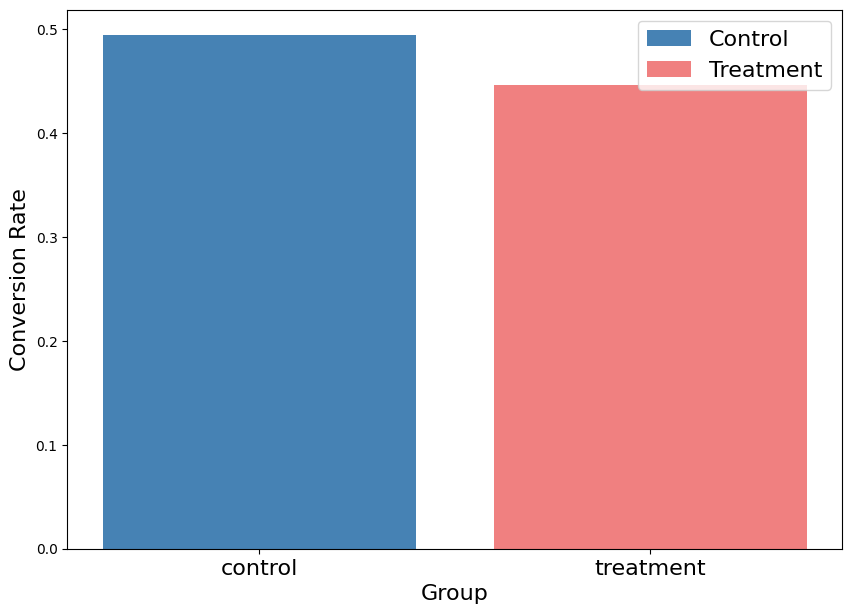

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.bar("control", cr_control, color="steelblue", label="Control")
ax.bar("treatment", cr_treatment, color="lightcoral", label="Treatment")

ax.set_ylabel("Conversion Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)
ax.legend(fontsize=16)
plt.show()

In [21]:
from statsmodels.stats.proportion import proportions_ztest

# 定义计数转换和观察总数
count_convert = [n_treatment_convert, n_control_convert]
count_observation = [n_treatment, n_control]

# 计算 z 统计量和 p 值
z_stat, p_value = proportions_ztest(count = count_convert,
                                    nobs = count_observation,
                                    alternative = 'larger')
print(f"Z stats : {z_stat:}")
print(f"P-value : {p_value:}")

# 计算 z 临界值
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
print(f"Z critical : {z_critical:}")

# 根据 p 值做出决定
if p_value < alpha:
    print("Decision : Reject Null Hypothesis")
else:
    print("Decision : Failed to Reject Null Hypothesis")

# 根据 z 检验做出决定
if z_stat > z_critical:
    print("Decision : Reject Null Hypothesis")
else:
    print("Decision : Failed to Reject Null Hypothesis")

Z stats : -1.0730903386873218
P-value : 0.8583847073204088
Z critical : 1.6448536269514722
Decision : Failed to Reject Null Hypothesis
Decision : Failed to Reject Null Hypothesis


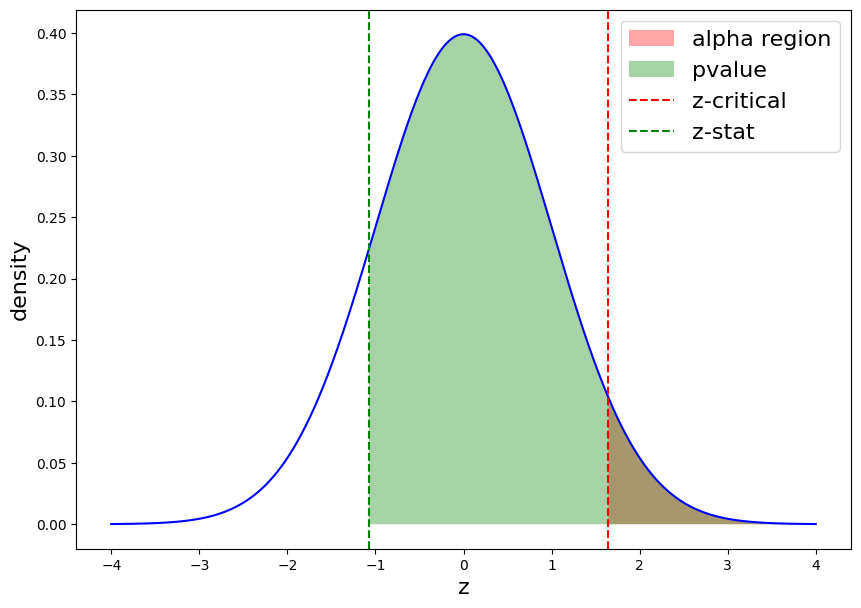

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

x_sample = np.arange(-4., 4., 0.001)
y_sample = stats.norm.pdf(x_sample, 0, 1)
ax.plot(x_sample, y_sample,
        color = "blue")

x_alpha = np.arange(z_critical, 4., 0.001)
y_alpha = stats.norm.pdf(x_alpha)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red", 
                alpha = .35,
                label = "alpha region")


x_test = np.arange(z_stat, 4., 0.001)
y_test = stats.norm.pdf(x_test)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green", 
                alpha = .35,
                label = "pvalue")


ax.axvline(z_critical, 
           color = "red",
           linestyle = "--",
           label = "z-critical")

ax.axvline(z_stat, 
           color = "green",
           linestyle = "--",
           label = "z-stat")

ax.set_xlabel("z", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [23]:
import statsmodels.stats.proportion as smp

# 计算置信区间
confidence_interval = smp.confint_proportions_2indep(count1=n_treatment_convert, nobs1=n_treatment,
                                                     count2=n_control_convert, nobs2=n_control, 
                                                     compare='diff', alpha=0.05)

print(confidence_interval)

(-0.13386823518539348, 0.039266242474423535)
